# Temperature Forecast Project using ML<br><br><br><br>
**Problem Statement:**<br><br>

**Data Set Information:**<br><br>

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.<br><br>
<br>

**Attribute Information:**<br><br>

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T<br><br>

* There are two target variables here: 

  1) Next_Tmax: Next day maximum temperature

  2) Next_Tmin: Next day  minimum temperature

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Loading the dataset

In [3]:
df=pd.read_csv("temperature_dataset")

### Exploratory Data Analysis

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


This shows the first five rows of the dataset.

In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


This shows the last five rows of the dataset.

In [6]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns in the dataset.

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

We can see all the column names here.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

* We can see that there is only one column of datatype Object and the rest are of float64 datatype.

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see that there are null values in almost all the columns. Let us fill them with appropriate values wherever required and remove them if they are very less. 

**Cleaning the data**

In [10]:
#replacing with most common station.
df['station'].fillna(df['station'].mode()[0], inplace = True)

In [11]:
#replacing NaN values in Present_Tmax with mean.
df['Present_Tmax'].fillna(value=df['Present_Tmax'].mean(), inplace=True)

In [12]:
#replacing NaN values in Present_Tmin with mean.
df['Present_Tmin'].fillna(value=df['Present_Tmin'].mean(), inplace=True)

In [13]:
#replacing NaN values in LDAPS_RHmin with mean.
df['LDAPS_RHmin'].fillna(value=df['LDAPS_RHmin'].mean(), inplace=True)

In [14]:
#replacing NaN values in LDAPS_RHmax with mean.
df['LDAPS_RHmax'].fillna(value=df['LDAPS_RHmax'].mean(), inplace=True)

In [15]:
#replacing NaN values in LDAPS_Tmax_lapse with mean.
df['LDAPS_Tmax_lapse'].fillna(value=df['LDAPS_Tmax_lapse'].mean(), inplace=True)

In [16]:
#replacing NaN values in LDAPS_Tmin_lapse with mean.
df['LDAPS_Tmin_lapse'].fillna(value=df['LDAPS_Tmin_lapse'].mean(), inplace=True)

In [17]:
#replacing NaN values in LDAPS_WS with mean.
df['LDAPS_WS'].fillna(value=df['LDAPS_WS'].mean(), inplace=True)

In [18]:
#replacing NaN values in LDAPS_LHLDAPS_LH with mean.
df['LDAPS_LH'].fillna(value=df['LDAPS_LH'].mean(), inplace=True)

In [19]:
#replacing NaN values in LDAPS_CC2 with mean.
df['LDAPS_CC2'].fillna(value=df['LDAPS_CC2'].mean(), inplace=True)

In [20]:
#replacing NaN values in LDAPS_CC3 with mean.
df['LDAPS_CC3'].fillna(value=df['LDAPS_CC3'].mean(), inplace=True)

In [21]:
#replacing NaN values in LDAPS_CC4 with mean.
df['LDAPS_CC4'].fillna(value=df['Present_Tmax'].mean(), inplace=True)

In [22]:
#replacing NaN values in LDAPS_CC4 with mean.
df['LDAPS_CC4'].fillna(value=df['LDAPS_CC4'].mean(), inplace=True)

In [23]:
#replacing NaN values in LDAPS_PPT1 with mean.
df['LDAPS_PPT1'].fillna(value=df['LDAPS_PPT1'].mean(), inplace=True)

In [24]:
#replacing NaN values in LDAPS_PPT2 with mean.
df['LDAPS_PPT2'].fillna(value=df['LDAPS_PPT2'].mean(), inplace=True)

In [25]:
#replacing NaN values in LDAPS_PPT3 with mean.
df['LDAPS_PPT3'].fillna(value=df['LDAPS_PPT3'].mean(), inplace=True)

In [26]:
#replacing NaN values in LDAPS_PPT4 with mean.
df['LDAPS_PPT4'].fillna(value=df['LDAPS_PPT4'].mean(), inplace=True)

In [27]:
#replacing NaN values in Next_Tmax with mean.
df['Next_Tmax'].fillna(value=df['Next_Tmax'].mean(), inplace=True)

In [28]:
#replacing NaN values in Next_Tmin with mean.
df['Next_Tmin'].fillna(value=df['Next_Tmin'].mean(), inplace=True)

In [29]:
# All the other NaN values in the dataset are replaced.

# There are only two NaN values in Date column now. Dropping these rows.

df = df.dropna(axis = 0, how ='any')

In [30]:
#checking if the null values are removed now
df.isnull().any().any()

False

### Data Pre-Processing

We can see that 'Date' is of object datatype.<br>
I am converting this colums into timestamp using "pandas to_datetime" so that it would be helpful for model predicting.
<br><br>
---> Converting 'Date'

In [36]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [37]:
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017,8,30
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017,8,30
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017,8,30
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017,8,30


We can see that the new columns for day, month and year are added to the dataset.

In [40]:
# dropping Date column as we have extracted day, year and month separately.
df.drop(['Date'], axis=1, inplace= True)

<AxesSubplot:xlabel='Present_Tmax', ylabel='count'>

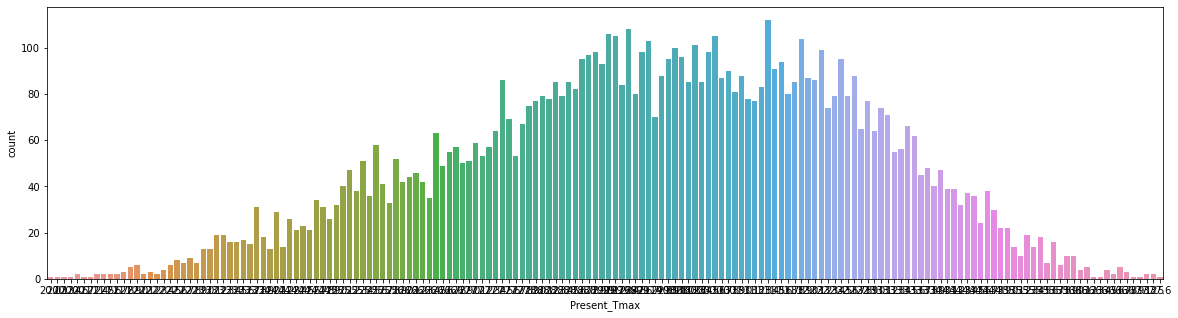

In [162]:
# plotting a bar plot
plt.figure(figsize=(20,5))
sns.countplot(x='Present_Tmax', data=df )

<AxesSubplot:xlabel='Present_Tmin', ylabel='count'>

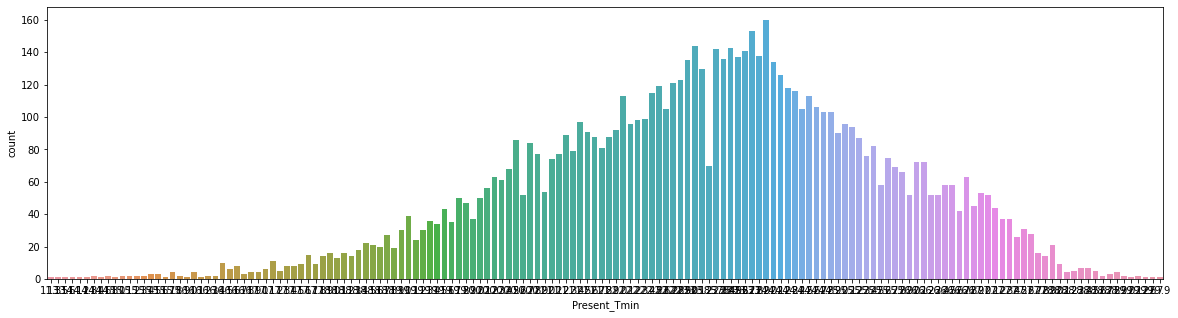

In [163]:
# plotting a bar plot
plt.figure(figsize=(20,5))
sns.countplot(x='Present_Tmin', data=df )

**Outliers**

<AxesSubplot:>

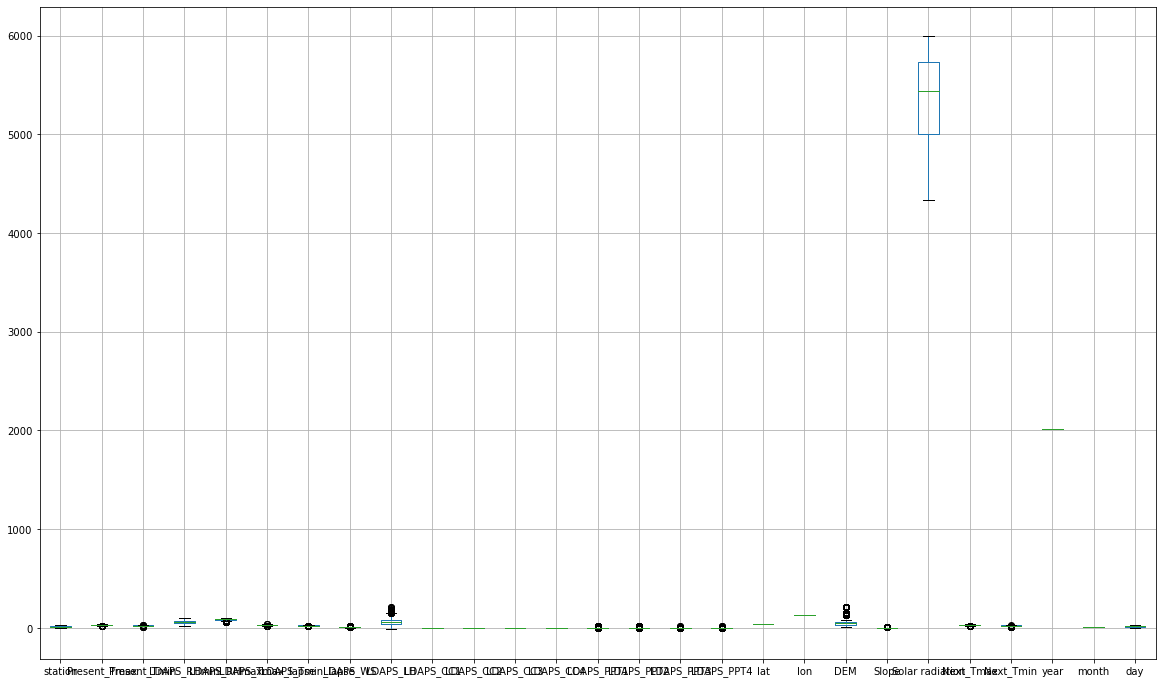

In [42]:
plt.figure(figsize=(20,12))
df.boxplot()

We can see that there are few outliers however they are very nearer to the whiskers. This might be because of the variation in the temperature and weather in some of the days.

**Statistical information**

In [45]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
count,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000
mean,13.000000,29.747241,23.196567,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,0.356047,0.318359,0.299142,0.589061,0.482312,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5343.679759,30.238140,22.910850,2015.000000,7.465798,15.941368
std,7.211572,2.953062,2.388934,14.656200,7.183861,2.942632,2.342243,2.177080,33.679766,0.262369,0.257968,0.250253,0.254241,1.928044,1.746438,1.148292,1.191776,0.050335,0.079406,54.256987,1.369834,429.826373,3.105675,2.476115,1.414306,0.530509,8.911458
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.700000,45.963839,84.223911,27.673670,22.089794,5.679220,37.272626,0.146673,0.140623,0.101466,0.081575,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5002.308105,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.300000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5441.393066,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.189583,93.743027,31.709230,25.152881,8.031527,84.222851,0.575126,0.558551,0.496700,0.499459,0.052499,0.018340,0.007893,0.000041,37.577600,127.042000,59.832400,1.767800,5729.839844,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


We can see the statistical distribution of the data here.

**Correlation**

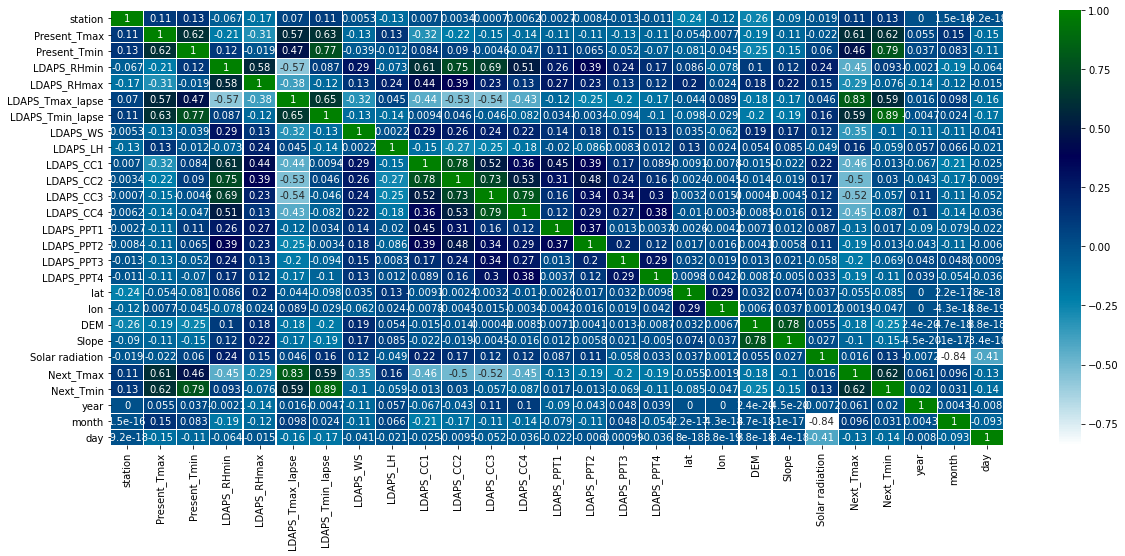

In [49]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="ocean_r", annot=True)
plt.yticks(rotation=0);

The heatmap shows the correlation between the columns.

**Skewness**

In [50]:
df.skew()

station             0.000000
Present_Tmax       -0.257669
Present_Tmin       -0.356614
LDAPS_RHmin         0.298775
LDAPS_RHmax        -0.846542
LDAPS_Tmax_lapse   -0.223124
LDAPS_Tmin_lapse   -0.576231
LDAPS_WS            1.548894
LDAPS_LH            0.664354
LDAPS_CC1           0.456970
LDAPS_CC2           0.469680
LDAPS_CC3           0.636990
LDAPS_CC4           0.662606
LDAPS_PPT1          5.298633
LDAPS_PPT2          5.685590
LDAPS_PPT3          6.337865
LDAPS_PPT4          6.710587
lat                 0.086942
lon                -0.285300
DEM                 1.723947
Slope               1.563349
Solar radiation    -0.521091
Next_Tmax          -0.336020
Next_Tmin          -0.394248
year                0.006911
month              -0.190935
day                -0.009624
dtype: float64

We can see that most of the data has negligible skewness. Some of the columns have high skewness. This might be because of high variations in wind speed on certain days.

### Predictive Modelling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [123]:
X=df.drop(columns =['Next_Tmax', 'Next_Tmin'])

In [83]:
y = df.iloc[:, 22:24]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Creating multilabel dataset**

In [86]:
from sklearn.datasets import make_multilabel_classification

In [87]:
# this will generate a random multi-label dataset
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

**--->Accuracy of different models.**

Now, in a multi-label classification problem, we can’t simply use our normal metrics to calculate the accuracy of our predictions. For that purpose, we will use accuracy score metric. This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

**Checking accuracies using binary relevance**

This is the simplest technique, which basically treats each label as a separate single class classification problem.

---> GaussianNB Model

In [90]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6

---> Random Forest Model

In [140]:
from sklearn.ensemble import RandomForestClassifier 
rf = BinaryRelevance(RandomForestClassifier(n_estimators=300))
rf.fit(X_train, y_train)
predictions_rf = classifier.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_rf)

0.65

---> Decision Tree Model

In [138]:
from sklearn.tree import DecisionTreeClassifier 
dt = BinaryRelevance(DecisionTreeClassifier())
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_dt)

0.55

**Checking accuracies using classifier chains**

In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.  <br><br> This is quite similar to binary relevance, the only difference being it forms chains in order to preserve label correlation. So, let’s try to implement this using multi-learn library.

---> GaussianNB Model

In [92]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.25

---> Random Forest Model

In [143]:
from sklearn.ensemble import RandomForestClassifier 
rf_cc = ClassifierChain(RandomForestClassifier())
rf_cc.fit(X_train, y_train)
predictions = rf_cc.predict(X_test)

In [144]:
# train
rf_cc.fit(X_train, y_train)

# predict
predictions_rf_cc = rf_cc.predict(X_test)

accuracy_score(y_test,predictions_rf_cc)

0.65

---> Decision Tree Model

In [151]:
from sklearn.tree import DecisionTreeClassifier 
dt_cc = ClassifierChain(DecisionTreeClassifier())
dt_cc.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

# train
model_tree= dt_cc.fit(X_train, y_train)

# predict
predictions_dt_cc = dt_cc.predict(X_test)

accuracy_score(y_test,predictions_dt_cc)

0.5

**Checking accuracies using Label Powerset**

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.<br><br>So, label powerset has given a unique class to every possible label combination that is present in the training set.

---> GaussianNB Model

In [131]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
model_nb= classifier.fit(X_train, y_train)

# predict
predictions = model_nb.predict(X_test)

accuracy_score(y_test,predictions)

0.6

---> Random Forest Model

In [147]:
from sklearn.ensemble import RandomForestClassifier 
rf_lp = LabelPowerset(RandomForestClassifier())
rf_lp.fit(X_train, y_train)
predictions_rf_lp = rf_lp.predict(X_test)

In [148]:
# train
model_rf_lp= rf_lp.fit(X_train, y_train)

# predict
predictions_rf_lp = model_rf_lp.predict(X_test)

accuracy_score(y_test,predictions_rf_lp)

0.65

---> Decision Tree Model

In [149]:
from sklearn.tree import DecisionTreeClassifier 
dt_lp = LabelPowerset(DecisionTreeClassifier())
dt_lp.fit(X_train, y_train)
predictions_dt_lp = dt_lp.predict(X_test)


# train
model_dt_lp= dt_lp.fit(X_train, y_train)

# predict
predictions_dt_lp = model_dt_lp.predict(X_test)

accuracy_score(y_test,predictions_dt_lp)

0.65

We can see that the random forest model got better accuracy than other two models.

### Saving the Model

In [106]:
import joblib

In [153]:
joblib.dump(model_rf_lp, 'temperature_forecast.pkl')

['temperature_forecast.pkl']

In [154]:
# Load the model from the file
model_rf_lp_from_joblib = joblib.load('temperature_forecast.pkl')

In [155]:
# Use the loaded model to make predictions
model_rf_lp_from_joblib.predict(X_test)

<20x5 sparse matrix of type '<class 'numpy.int64'>'
	with 100 stored elements in List of Lists format>